# Практическая работа №3
# Регрессионный анализ
Регрессионный анализ - это статистический аналитический метод, который позволяет вычислить предполагаемые отношения между зависимой переменной и несколькими независимыми переменными. Регрессионный анализ используется для предсказания значения зависимой переменной на основе значений независимых переменных
Регрессионный анализ делает это путем построения уравнения регрессии, которое описывает функциональную зависимость между переменными. Уравнение регрессии содержит коэффициенты, которые показывают направление и силу взаимодействия между переменными. Регрессионный анализ также дает статистические показатели.

## Импорт необходимых библиотек

In [74]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, \
    Lars, TweedieRegressor, BayesianRidge, LassoLars
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, \
    chi2, SelectFromModel, SequentialFeatureSelector
from scipy.stats import t
from typing import Union
from itertools import product
import pandas as pd
import statsmodels.api as sm
from functions import compare_regression_models
import numpy as np
from math import log
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
dataframe_train = pd.read_csv("../data/train.csv")
dataframe_test = pd.read_csv("../data/test.csv")
dataframe_train.head(10)

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,Балкон,Лоджия,Совмещенный.санузел,Раздельный.санузел,Лифт,Грузовой.лифт,Мусоропровод,Год.постройки,Аварийный,Железобетонные.перекрытия,Смешанные.перекрытия,Деревянные.перекрытия,Иные.перекрытия,Панельные.стены,Блочные.стены,Деревянные.стены,Кирпичные.стены,Монолитные.стены,Смешанные.стены,Школа.1000,ВУЗ.1000,ТЦ.1000,Стоматология.1000,Почта.1000,Поликлиника.1000,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,1,1,0,1,0,0,0,0,1963,0,1,0,0,0,1,0,0,0,0,0,8,5,2,7,3,1,1,11,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,1,1,0,1,0,0,0,0,1969,0,1,0,0,0,1,0,0,0,0,0,3,1,1,5,2,2,1,8,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,0,0,0,0,0,1,0,1,1977,0,1,0,0,0,1,0,0,0,0,0,6,1,5,8,4,6,1,13,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,0,1,0,1,0,0,0,0,1966,0,1,0,0,0,0,0,0,1,0,0,5,25,8,15,3,7,1,16,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,0,0,0,1,0,0,2,1,2006,0,1,0,0,0,0,0,0,0,1,0,1,0,0,2,1,1,0,2,1,3,0,2,3,9,0,3,6,1880000.0
5,1210,2,0,46.0,3,4,0,0,0,0,1,1,0,1,0,0,0,0,1960,0,1,0,0,0,0,0,0,1,0,0,7,4,3,16,2,3,3,18,38,6,2,15,0,27,9,11,25,2400000.0
6,1485,1,0,45.0,8,9,0,1,0,0,0,0,1,1,0,1,0,1,2007,0,1,0,0,0,0,0,0,1,0,0,6,0,3,15,2,5,0,8,8,9,0,8,1,33,4,4,15,2870000.0
7,1557,2,0,54.5,3,14,0,1,0,0,0,0,1,0,1,1,1,1,1978,0,1,0,0,0,1,0,0,0,0,0,7,4,1,7,3,4,1,17,11,4,1,12,4,15,2,14,14,2700000.0
8,1482,4,0,86.0,1,10,0,1,0,0,0,0,0,0,0,1,0,1,1994,0,1,0,0,0,1,0,0,0,0,0,4,0,4,27,5,4,1,11,16,11,0,9,2,42,12,10,30,3200000.0
9,295,2,0,42.0,2,5,0,0,0,0,1,1,0,1,0,0,0,0,1969,0,1,0,0,0,0,0,0,1,0,0,7,11,1,9,3,2,3,3,22,5,0,10,1,13,2,13,17,2560000.0


Выведем информацию о таблицах.

In [76]:
dataframe_train.info()
dataframe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

In [77]:
dataframe_train.isnull().sum()

id                           0
Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Без.ремонта                  0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Совмещенный.санузел          0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Иные.перекрытия              0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000 

Из вывода видно, что в столбцах нет пустых значений.

In [78]:
dataframe_train.describe()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,Балкон,Лоджия,Совмещенный.санузел,Раздельный.санузел,Лифт,Грузовой.лифт,Мусоропровод,Год.постройки,Аварийный,Железобетонные.перекрытия,Смешанные.перекрытия,Деревянные.перекрытия,Иные.перекрытия,Панельные.стены,Блочные.стены,Деревянные.стены,Кирпичные.стены,Монолитные.стены,Смешанные.стены,Школа.1000,ВУЗ.1000,ТЦ.1000,Стоматология.1000,Почта.1000,Поликлиника.1000,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.00000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,794.887376,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,0.632426,0.181931,0.394802,0.480198,0.553218,0.101485,0.530941,1986.219059,0.003713,0.919554,0.030941,0.045792,0.003713,0.602723,0.017327,0.002475,0.316832,0.040842,0.019802,4.154703,2.94802,1.777228,8.298267,2.175743,2.293317,0.728960,9.275990,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,461.218298,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,0.635417,0.410905,0.491638,0.512161,0.565106,0.333355,0.499351,20.256724,0.060858,0.272150,0.173264,0.209163,0.060858,0.489637,0.130567,0.049721,0.465529,0.198046,0.139406,2.630406,5.78399,1.718008,6.719658,1.329787,1.697540,0.887503,5.179008,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1935.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,406.500000,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,3.000000,1.000000,1.000000,0.000000,6.000000,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,774.500000,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1983.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.00000,2.000000,7.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,1181.500000,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2007.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.00000,3.000000,11.000000,3.000000,3.000000,1.000000,12.000000,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,1615.000000,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,4.000000,2.00

Изначально уже проведено кодирование категориальных признаков. Чтобы избежать «ловушки фиктивной переменной», необходимо сделать следующее: если у нас n вариантов категориального признака, то надо оставить n-1 фиктивных колонок после одноразового кодирования. Оставляя n-1 фиктивных колонок, мы убираем линейную зависимость между фиктивными колонками и делаем нашу модель более стабильной и точной.

In [79]:
dataframe_train.drop("Евроремонт", axis=1, inplace=True)
dataframe_train.drop("Совмещенный.санузел", axis=1, inplace=True)
dataframe_train.drop("Деревянные.перекрытия", axis=1, inplace=True)
dataframe_train.drop("Деревянные.стены", axis=1, inplace=True)

Так как признак id не играет важной роли в предсказании, то можем удалить его из датафреймов.

In [80]:
dataframe_train.drop("id", axis=1, inplace=True)
test_ids = dataframe_test["id"]
dataframe_test.drop("id", axis=1, inplace=True)

Разделим наши признаки на категориальные и числовые.

In [81]:
result_column = "Цена"

# Получаем серию с количеством уникальных значений в каждом столбце
nunique = dataframe_train.nunique()

# Фильтруем серию по условию (в данном случае выбираем столбцы с более чем 5 уникальными значениями)
first_nunique = nunique[nunique > 5]

second_nunique = nunique[nunique <= 5]

# Получаем индекс отфильтрованной серии
first_index = first_nunique.index
second_index = second_nunique.index

# Преобразуем индекс в список
dataframe_numerical = first_index.tolist()
dataframe_numerical.remove(result_column)

# Преобразуем индекс в список
dataframe_categorical = second_index.tolist()

dataframe_all = dataframe_numerical + dataframe_categorical
dataframe_categorical

['Количество.комнат',
 'Студия',
 'Парковка',
 'Без.ремонта',
 'Дизайнерский',
 'Косметический',
 'Балкон',
 'Лоджия',
 'Раздельный.санузел',
 'Лифт',
 'Грузовой.лифт',
 'Мусоропровод',
 'Аварийный',
 'Железобетонные.перекрытия',
 'Смешанные.перекрытия',
 'Иные.перекрытия',
 'Панельные.стены',
 'Блочные.стены',
 'Кирпичные.стены',
 'Монолитные.стены',
 'Смешанные.стены',
 'Парк.1000',
 'Кинотеатр.1000']

In [82]:
dataframe_numerical

['Общая.площадь',
 'Этаж',
 'Этажей.в.доме',
 'Год.постройки',
 'Школа.1000',
 'ВУЗ.1000',
 'ТЦ.1000',
 'Стоматология.1000',
 'Почта.1000',
 'Поликлиника.1000',
 'Остановка.1000',
 'Одежда..1000',
 'Супер3кет.1000',
 'Кафе.1000',
 'АЗС.1000',
 'Детский.сад.1000',
 'Бар.1000',
 'Банк.1000',
 'Аптека.1000']

Произведём нормирование числовых признаков.

In [83]:
min_max_scaler = MinMaxScaler()
dataframe_train[dataframe_numerical] = min_max_scaler.fit_transform(
    dataframe_train[dataframe_numerical])
dataframe_test[dataframe_numerical] = min_max_scaler.fit_transform(
    dataframe_test[dataframe_numerical])
dataframe_train.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Косметический,Балкон,Лоджия,Раздельный.санузел,Лифт,Грузовой.лифт,Мусоропровод,Год.постройки,Аварийный,Железобетонные.перекрытия,Смешанные.перекрытия,Иные.перекрытия,Панельные.стены,Блочные.стены,Кирпичные.стены,Монолитные.стены,Смешанные.стены,Школа.1000,ВУЗ.1000,ТЦ.1000,Стоматология.1000,Почта.1000,Поликлиника.1000,Парк.1000,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,0.370738,0.169339,0.288985,0.142327,0.101485,0.024752,0.772277,0.632426,0.181931,0.480198,0.553218,0.101485,0.530941,0.617097,0.003713,0.919554,0.030941,0.003713,0.602723,0.017327,0.316832,0.040842,0.019802,0.276980,0.068559,0.161566,0.224277,0.362624,0.229332,0.728960,0.331285,0.120611,0.333893,0.143564,0.116244,0.312655,0.315800,0.079803,0.168874,0.336757,2.699083e+06
std,0.996109,0.198046,0.180250,0.163514,0.198105,0.349601,0.302157,0.155466,0.419622,0.635417,0.410905,0.512161,0.565106,0.333355,0.499351,0.244057,0.060858,0.272150,0.173264,0.060858,0.489637,0.130567,0.465529,0.198046,0.139406,0.175360,0.134511,0.156183,0.181612,0.221631,0.169754,0.887503,0.184965,0.179036,0.232571,0.378064,0.134081,0.204503,0.179949,0.114529,0.171839,0.201714,1.096460e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,0.251364,0.043478,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421687,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.081081,0.166667,0.100000,0.000000,0.214286,0.023256,0.142857,0.000000,0.044776,0.125000,0.190476,0.019231,0.050000,0.175000,1.950000e+06
50%,2.000000,0.000000,0.345455,0.130435,0.291667,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.578313,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.023256,0.181818,0.189189,0.333333,0.200000,1.000000,0.321429,0.046512,0.285714,0.000000,0.089552,0.250000,0.309524,0.057692,0.125000,0.300000,2.550000e+06
75%,3.000000,0.000000,0.482500,0.217391,0.333333,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.867470,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.400000,0.069767,0.272727,0.297297,0.500000,0.300000,1.000000,0.428571,0.139535,0.500000,0.000000,0.134328,0.500000,0.428571,0.096154,0.250000,0.475000,3.310000e+06
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.800000e+06


## Тепловые карты

Создадим тепловую карту из корреляционной матрицы (Корреляционная матрица - это квадратная таблица, которая показывает коэффициенты корреляции между несколькими переменными. Коэффициент корреляции - это мера линейной связи между двумя переменными, которая может принимать значения от -1 до 1. Корреляционная матрица позволяет видеть закономерности и взаимосвязи между переменными). Тепловая карта - это вид графика, который показывает данные в виде цветных прямоугольных плиток.

In [84]:
corr_matrix = dataframe_train.corr()  # Матрица корреляции между всеми столбцами датафрейма

In [85]:
def draw_large_heat_map(dataframe: pd.DataFrame, annot: bool, size: int) -> None:
    """
    Рисует большую тепловую карту
    :param dataframe: Датафрейм
    :param annot: Нужны ли числа на графике
    :param size: Размер
    :return: None
    """
    sb.set(font_scale=2)
    sb.heatmap(dataframe.corr(), annot=annot, cmap='coolwarm', linewidths=0.2,)
    # Добавляем заголовок и подписи осей
    plt.title('Корреляция между признаками dataframe_train')
    plt.xlabel('Признаки')
    plt.ylabel('Признаки')

    fig = plt.gcf()
    fig.set_size_inches(size, size)

    plt.show()

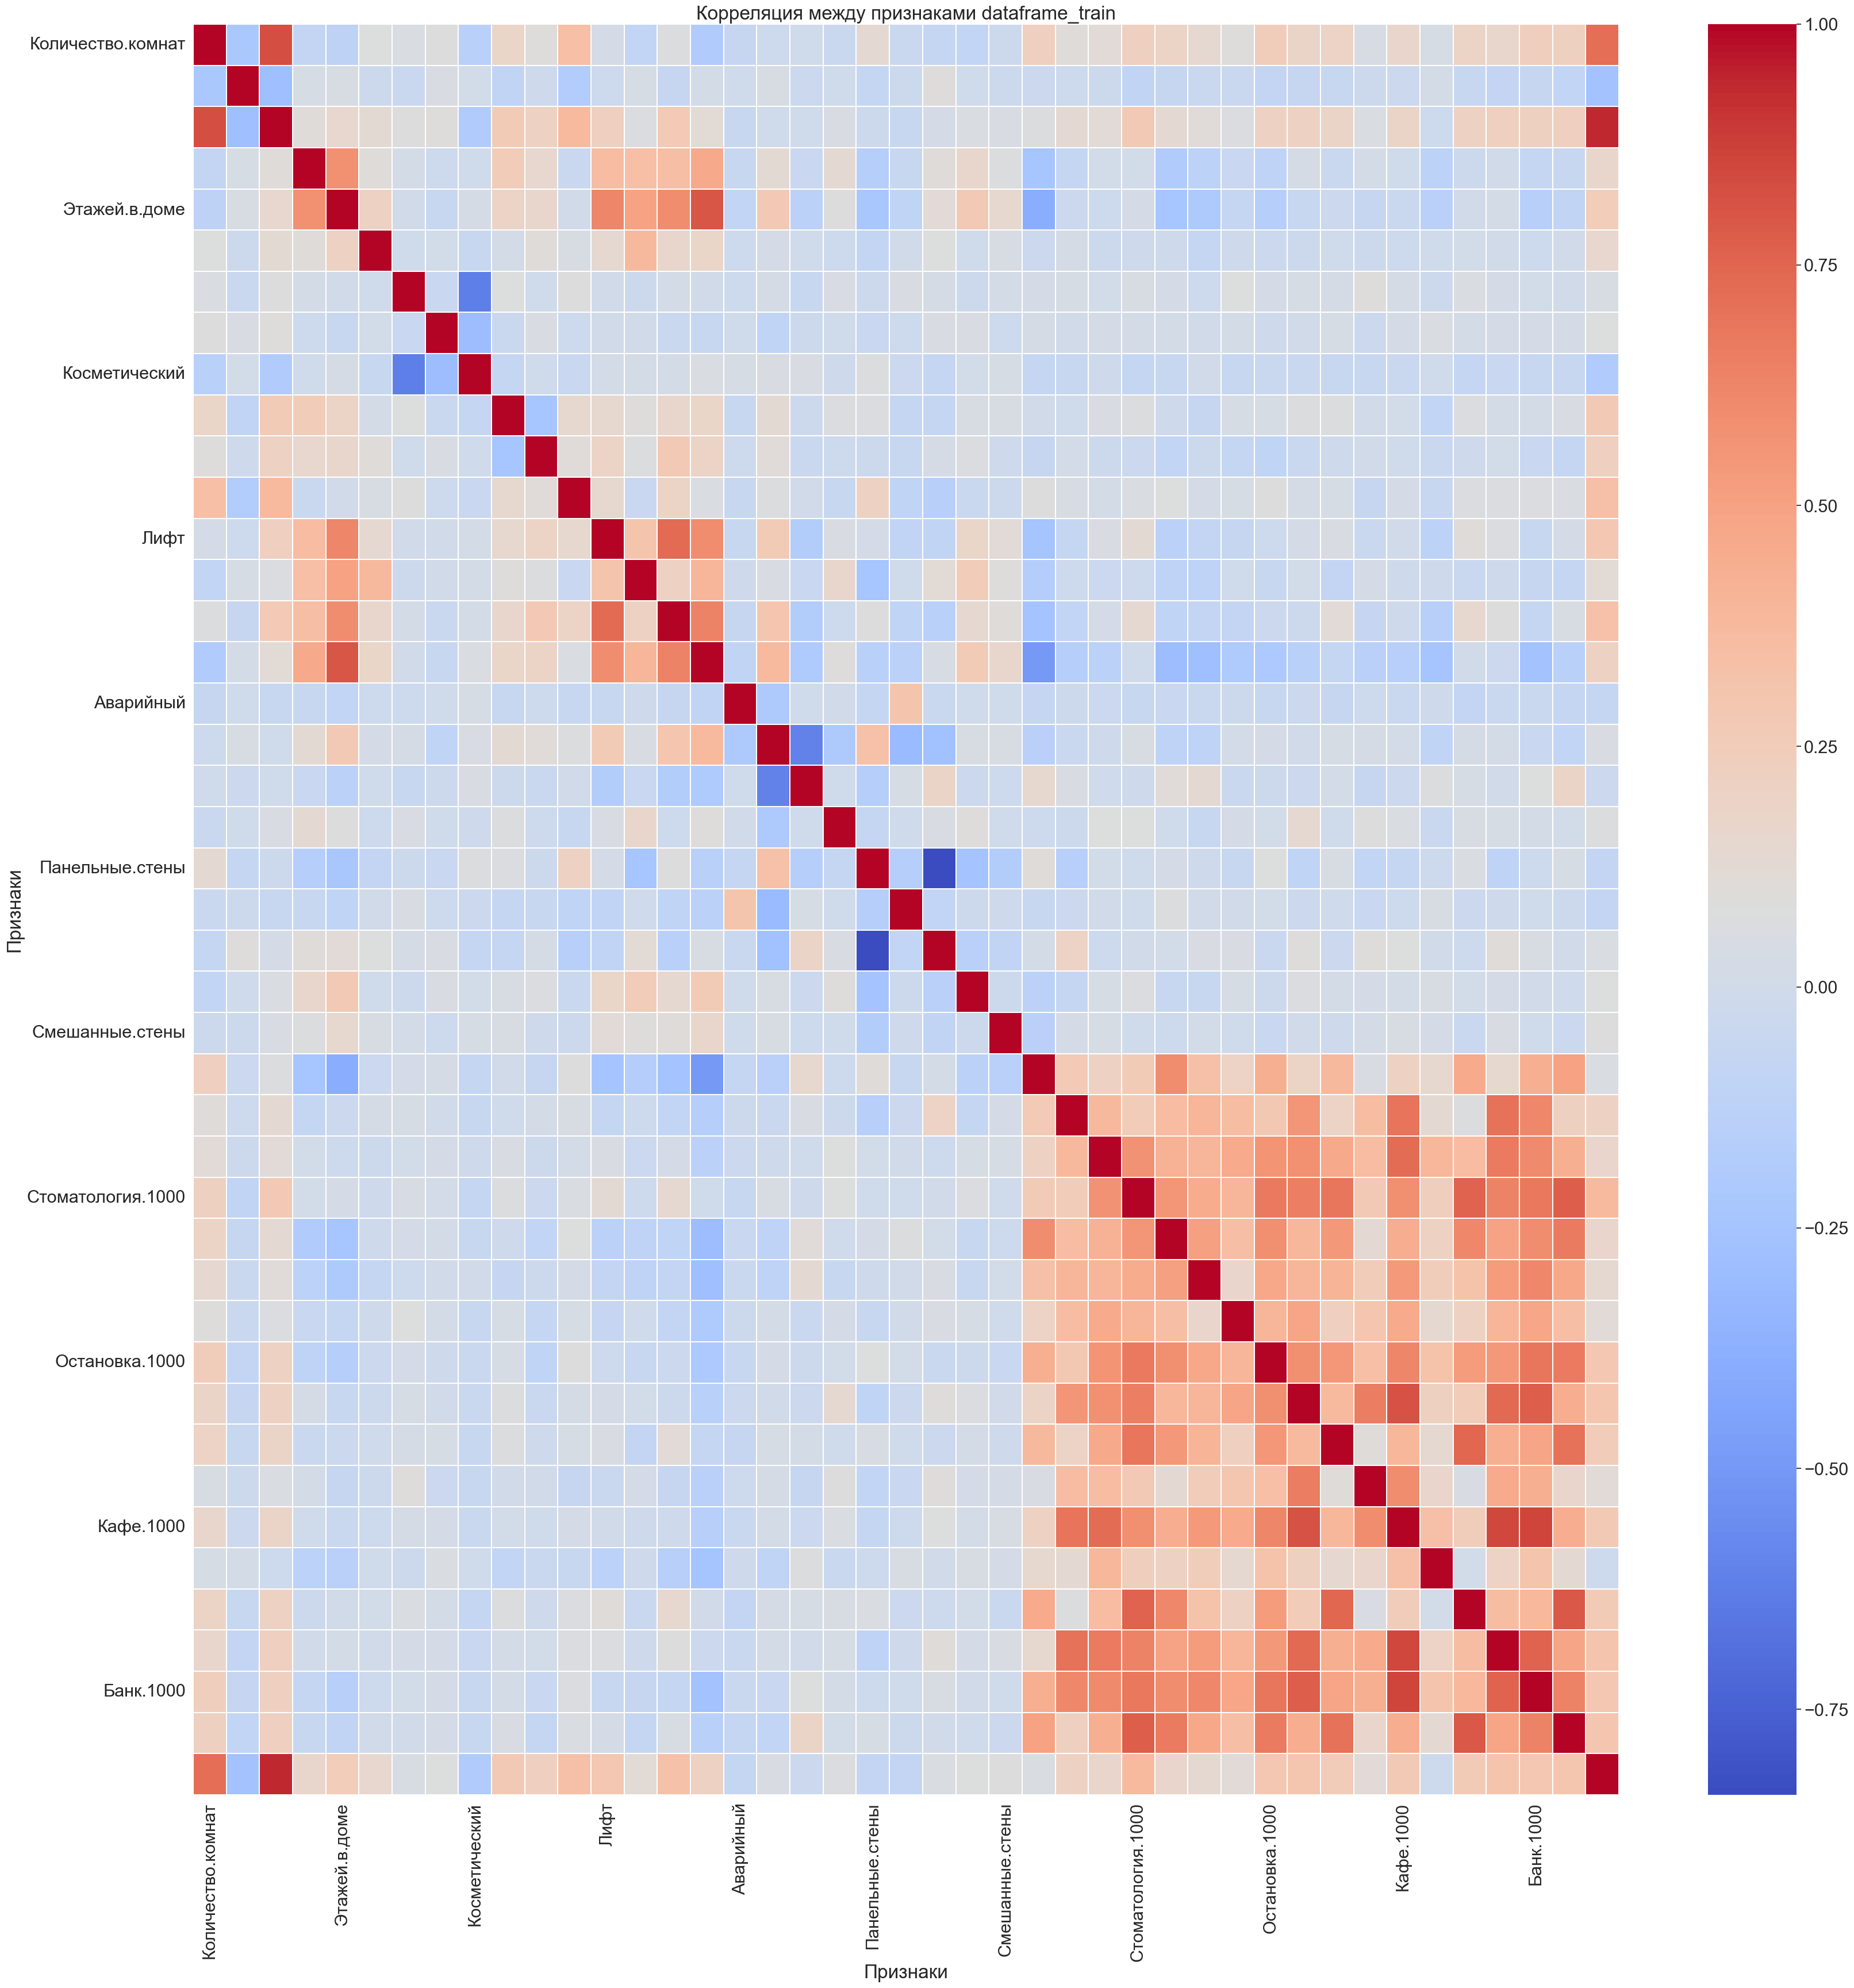

In [86]:
draw_large_heat_map(dataframe_train, False, 40)

Для более наглядного вида выведем корреляцию в более удобном формате.

In [87]:
def show_heat_map(colums: list, title: str):
    """
    Тепловая карта для признаков
    :param colums: Список признаков, которые будут на тепловой карте
    :param title: Название
    :return: None
    """
    corr_price_dataframe = dataframe_train.corr()[['Цена']].transpose()[colums]
    # Строим тепловую карту для визуализации корреляционной матрицы
    sb.heatmap(corr_price_dataframe, annot=True, fmt='.1g', vmin=-1, vmax=1,
               cmap='coolwarm')

    # Устанавливаем размер изображения
    fig = plt.gcf()
    fig.set_size_inches(35, 5)

    plt.title(f"Корреляция между ценой и {title} признаками")
    plt.show()

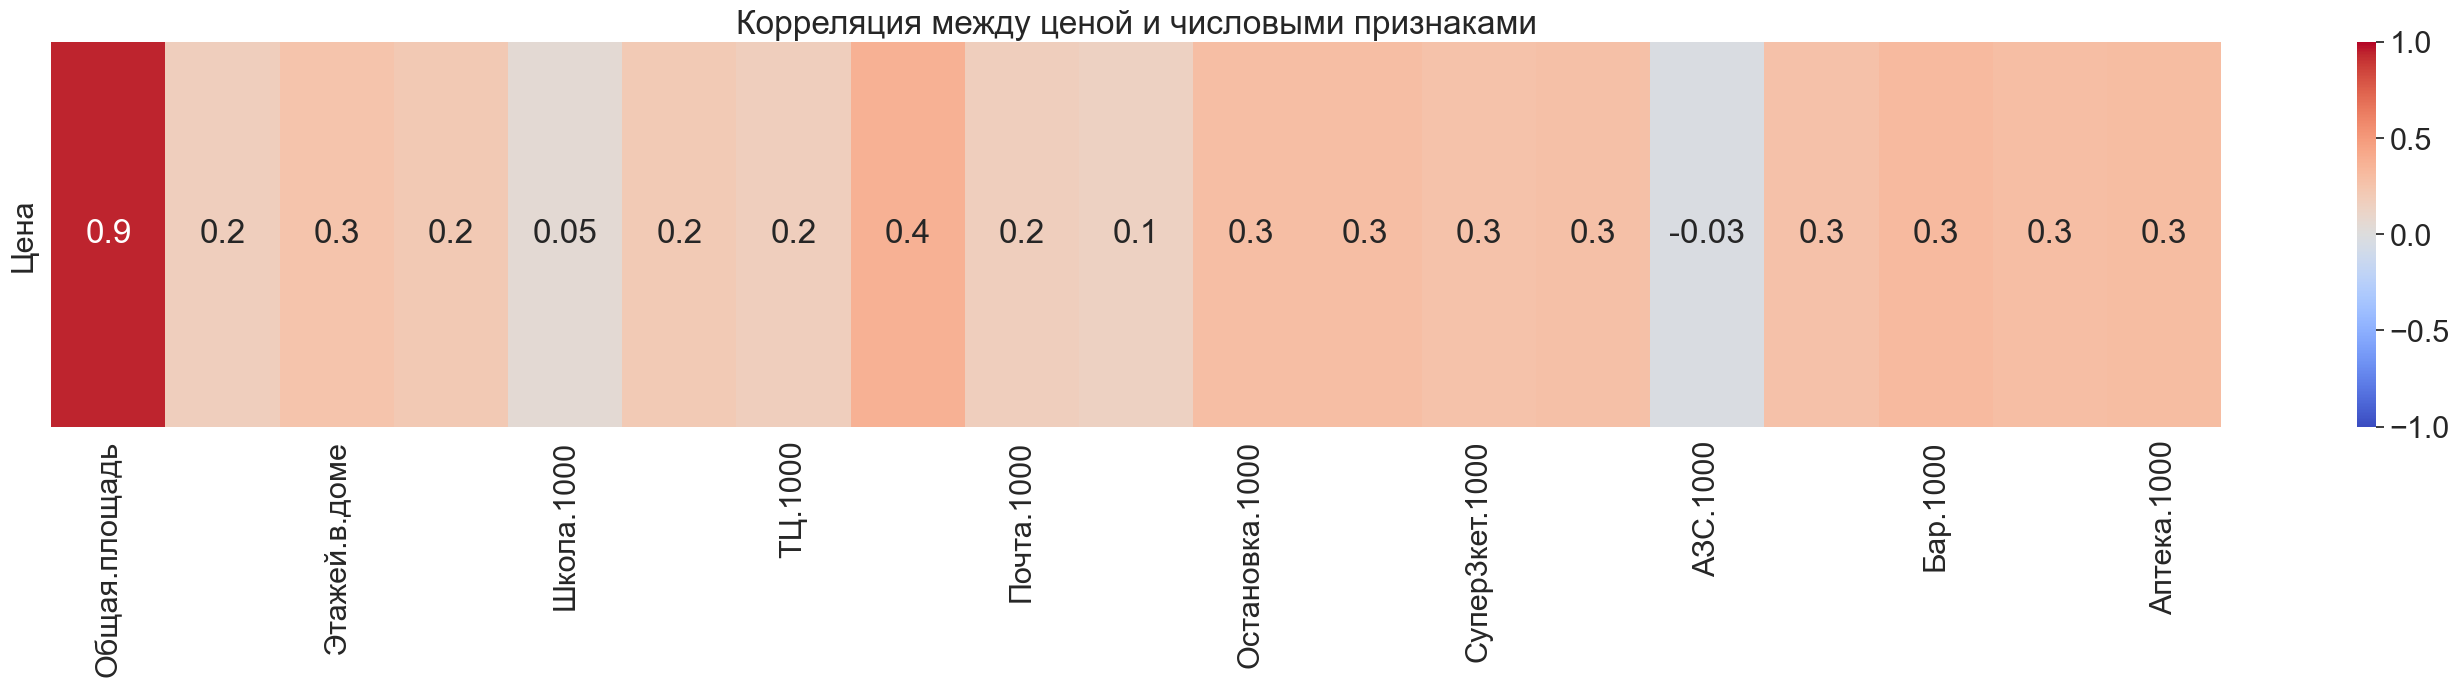

In [88]:
show_heat_map(dataframe_numerical, "числовыми")

### Удалим признаки, которые слабо коррелируют с зависимой переменной
Так как у нас много с корреляцией 0.3, выберем значение 0.29. Так мы сохраним больше информации и повысим точность предсказания.

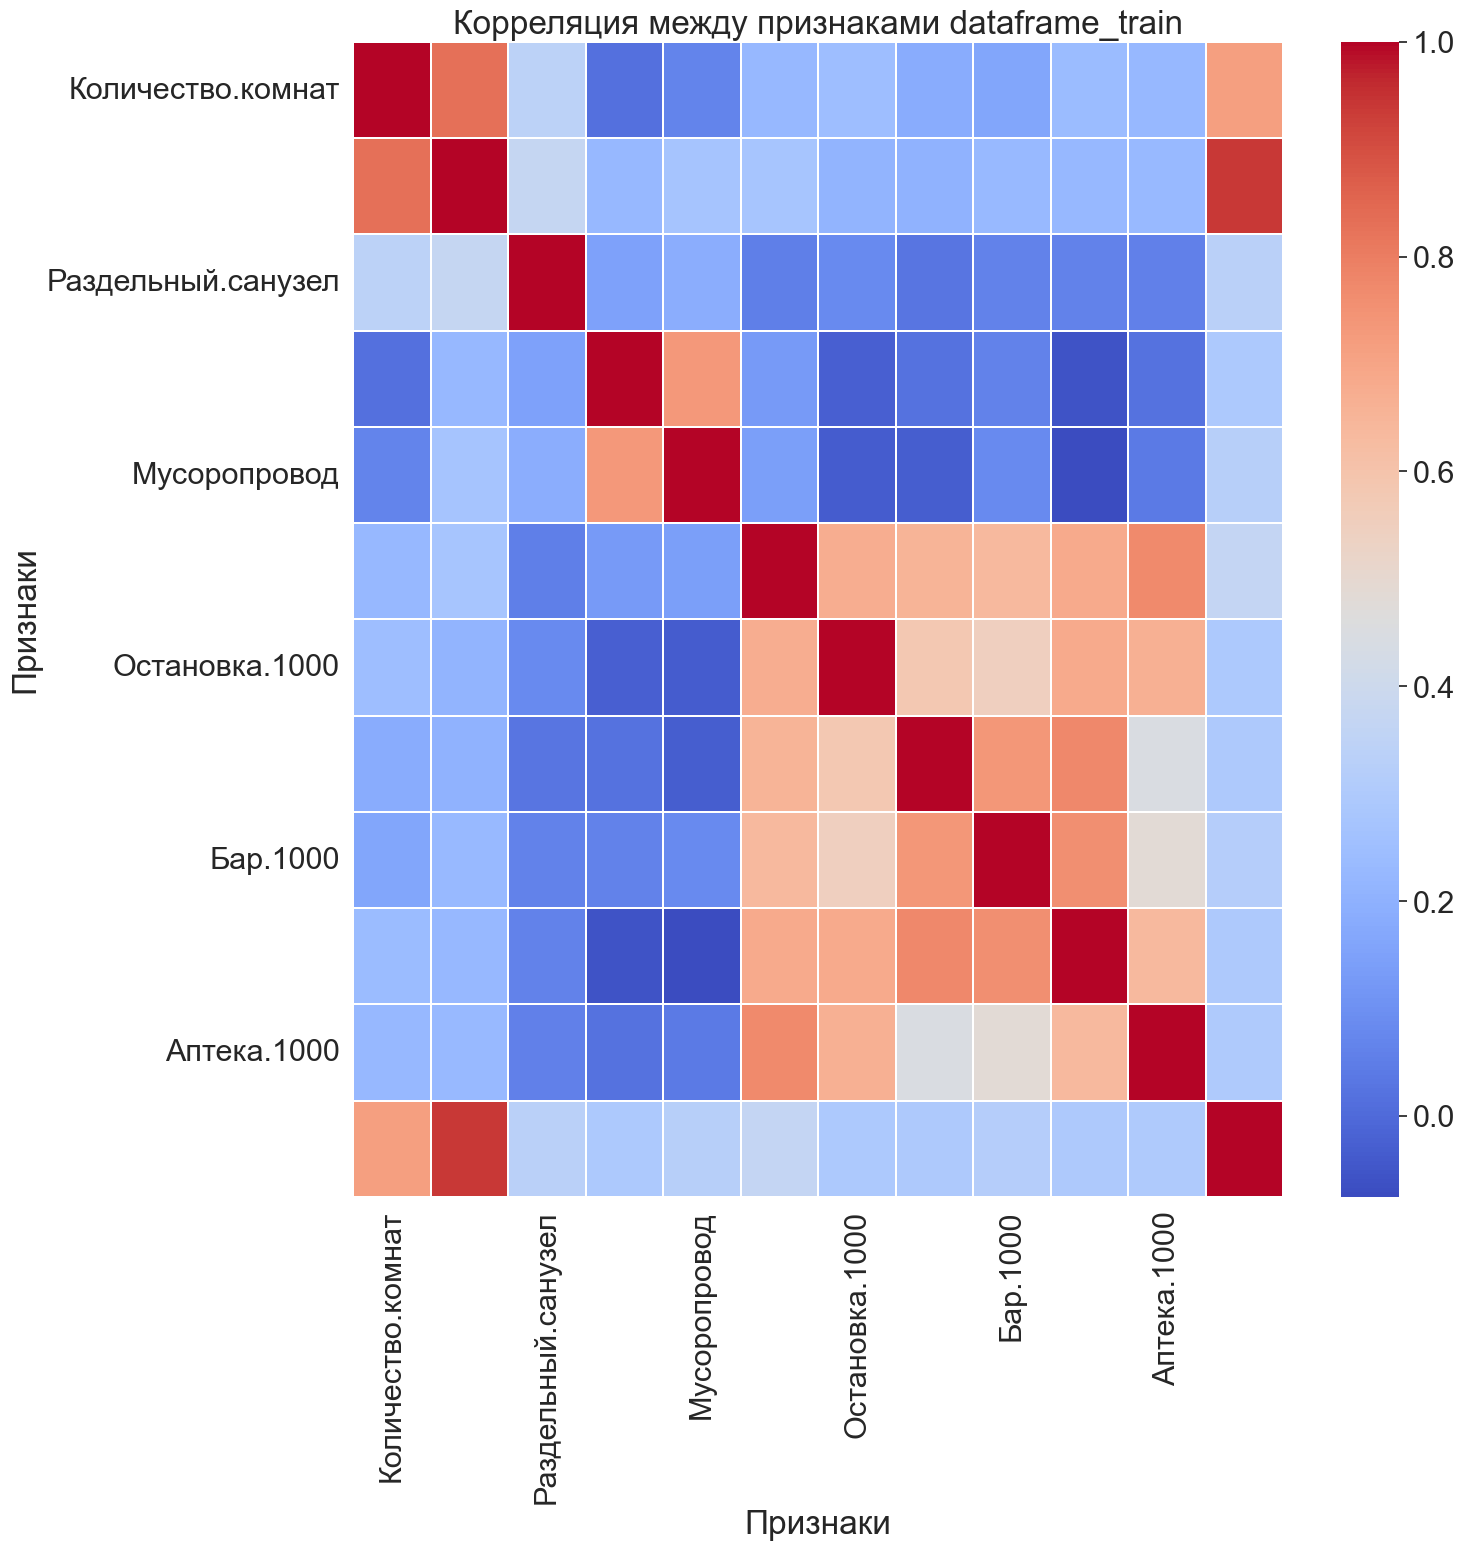

In [89]:
threshold = 0.29  # Пороговое значение для отбора признаков по корреляции с зависимой переменной

# Вычисляем серию значений корреляции между каждым столбцом датафрейма и зависимой переменной, берём модуль от этих значений
corr_price_matrix = dataframe_train.corrwith(dataframe_train[result_column]).abs()

# Создаём множество из имен столбцов, которые имеют корреляцию с ценой меньше или равную threshold
weak_corr_features = set(corr_matrix[corr_price_matrix <= threshold].index)
dataframe_train.drop(weak_corr_features, axis=1, inplace=True)

draw_large_heat_map(dataframe_train, False, 15)

### Удаление признаков, которые сильно коррелируют друг с другом

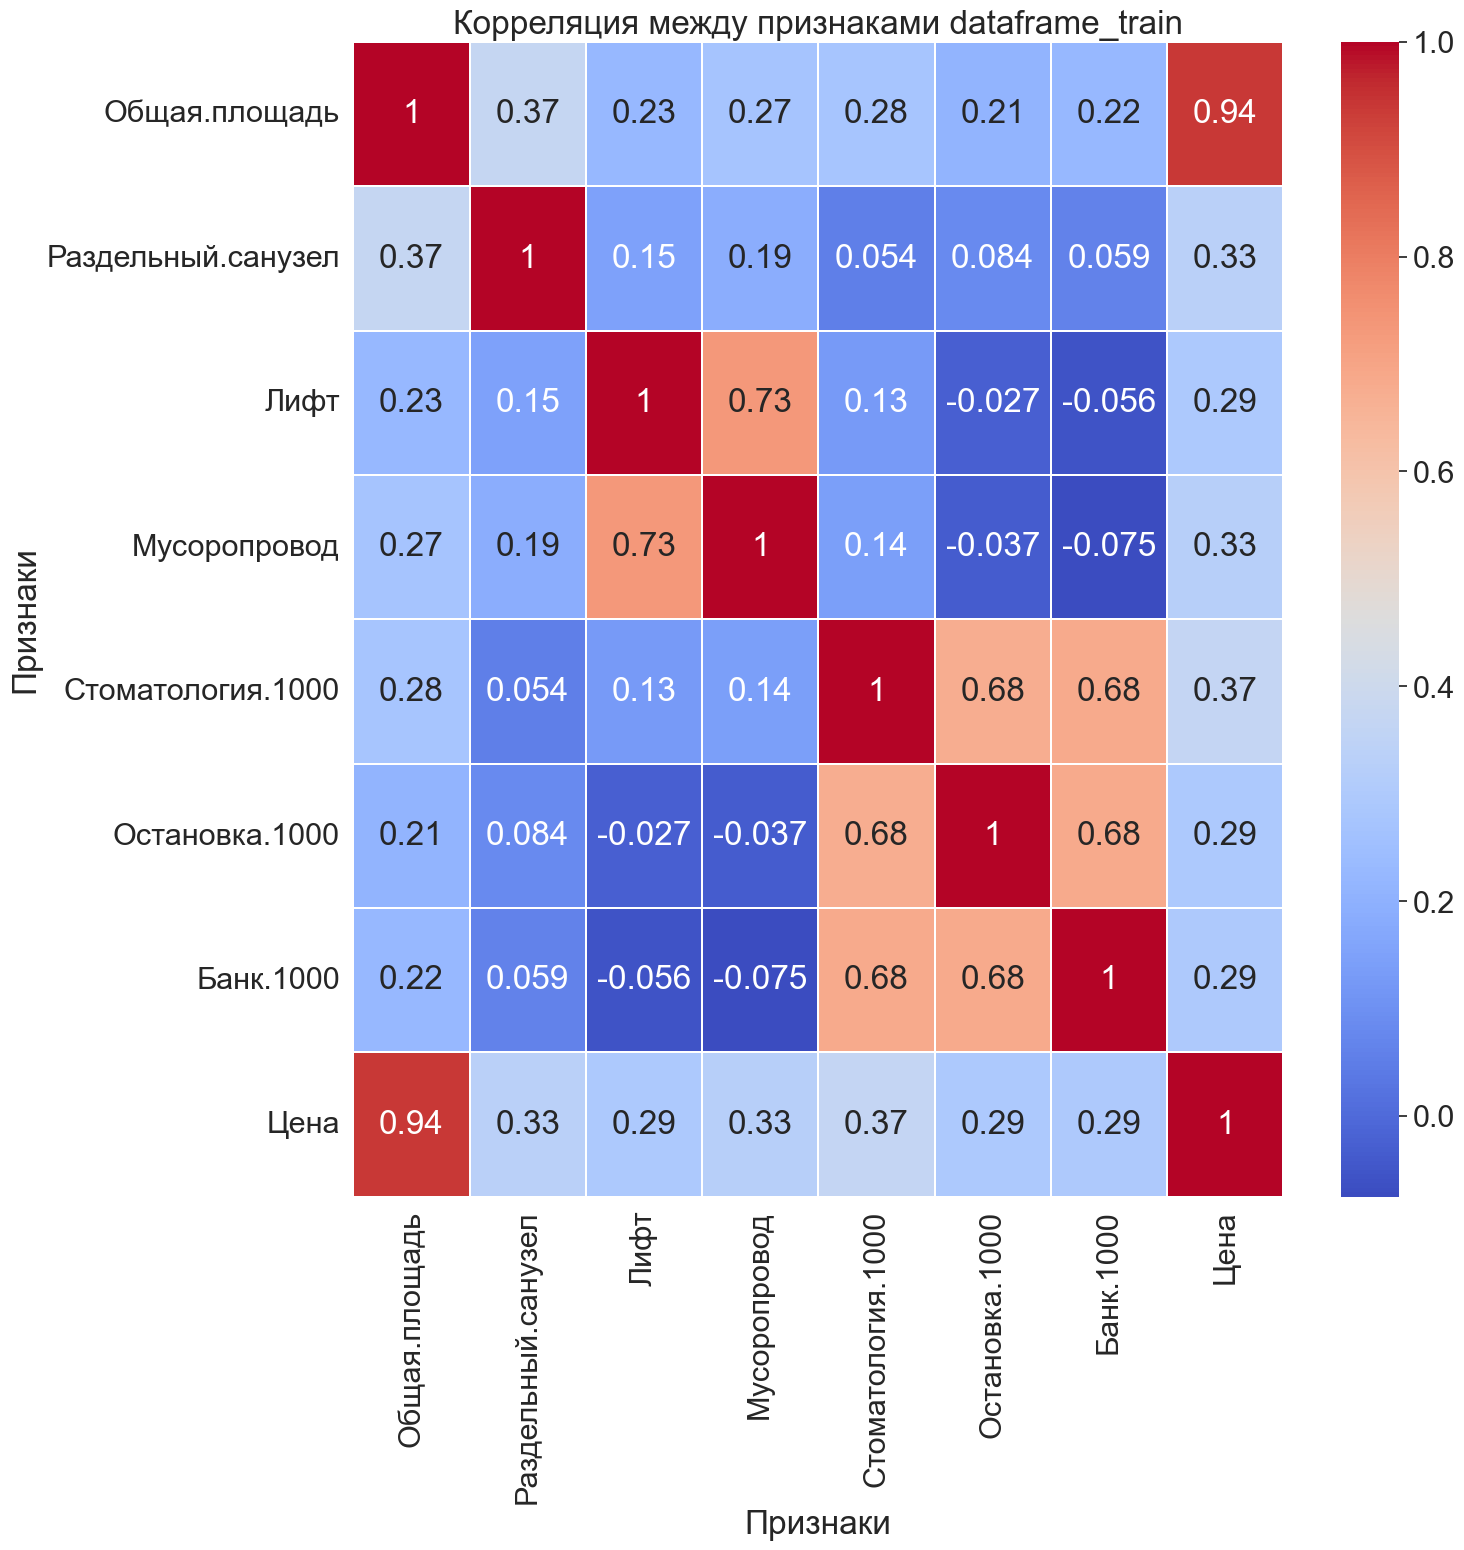

In [90]:
# Создает новый датафрейм dataframe_without_result_column, который содержит все столбцы из датафрейма, кроме цены
dataframe_without_result_column = dataframe_train.drop(result_column, axis=1)

# Вычислим матрицу корреляции между всеми столбцами в датафрейме, берём модуль от значений, преобразуем матрицу в серию и сортируем её по возрастанию
corr_series = dataframe_without_result_column.corr().abs().stack().sort_values()

# Удаляем дубликаты из серии корреляции - те пары признаков, которые имеют одинаковую корреляцию
corr_series = corr_series[~corr_series.duplicated()]

threshold = 0.75

# Создаём множество из имен столбцов, которые имеют корреляцию с другими столбцами больше порогового значения и не равную 1 (так как корреляция признака с самим собой равна 1)
drop_columns = set([feature2 for (feature1, feature2), corr in corr_series.items() if corr > threshold and corr != 1])
# Удаляем столбцы из изначального датафрейма, которые принадлежат множеству drop_columns
dataframe_train.drop(drop_columns, axis=1, inplace=True)

draw_large_heat_map(dataframe_train, True, 15)

In [91]:
x = dataframe_train.drop(result_column, axis=1)
y = dataframe_train[result_column]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=7)

## Построение регрессионных моделей

In [92]:
def get_criteria(model, x_test, y_test) -> pd.Series:
    """
    Вычисляет и возвращает различные критерии для оценки модели регрессии
    :param model: Модель
    :param x_test: Тестовые данные
    :param y_test: Тестовые данные
    :return:
    """
    # Проверяем, что модель имеет нужные методы
    if hasattr(model, "predict"):
        y_pred = model.predict(x_test) # Прогнозируем значения зависимой переменной
    elif hasattr(model, "fit"):
        y_pred = model.fit(x_test)[0] # Обучаем модель и получаем прогнозы
    else:
        raise ValueError("Модель должна иметь метод predict или fit.") # Выдаем исключение

    # Вычисляем коэффициент детерминации R^2
    r_sq = r2_score(y_test, y_pred)

    # Вычисляем скорректированный коэффициент детерминации Adj R^2
    n_samples, n_features = x_test.shape # Количество наблюдений и признаков
    adj_r_sq = 1 - (1 - r_sq) * (n_samples - 1) / (n_samples - n_features - 1)

    # Вычисляем среднеквадратическую ошибку RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Вычисляем информационный критерий Акаике AIC
    log_likelihood = -0.5 * (n_samples * np.log(2 * np.pi) + n_samples * np.log( np.sum(((y_test - y_pred) ** 2)) / n_samples) + n_samples)
    aic = 2 * n_features - 2 * log_likelihood

    # Вычисляем информационный критерий Байеса BIC
    bic = n_features * np.log(n_samples) - 2 * log_likelihood

    res = pd.Series({
        "R^2": r_sq,
        "Adj R^2": adj_r_sq,
        "RMSE": rmse,
        "AIC": aic,
        "BIC": bic
    })
    return res

In [93]:
def get_stats_vals(fitted_model, x_test, y_test) -> pd.DataFrame:
    """
    Функция возвращает датафрейм с различными статистическими характеристиками модели и ее коэффициентов.
    :param fitted_model: Обученная модель регресиии
    :param x_test: Тестовые данные для предикторов
    :param y_test: Тестовые данные для зависимой переменной
    :return: датафрейм
    """

    n, p = x_test.shape # Получаем количество наблюдений и предикторов из размера тестовых данных

    # Вычисляем среднеквадратичную ошибку модели на тестовых данных
    mse = mean_squared_error(y_test, fitted_model.predict(x_test))

    # Вычисляем стандартные ошибки коэффициентов модели по формуле
    std_errs = np.sqrt(np.diag(np.linalg.inv(np.dot(x_test.T, x_test))) * mse)

    # Получаем значения коэффициентов модели из атрибута coef_ или params
    coefs = fitted_model.coef_ if hasattr(fitted_model,
                                          "coef_") else fitted_model.params.values

    # Вычисляем t-значения коэффициентов как отношение оценки к стандартной ошибке
    t_values = coefs / std_errs

    # Вычисляем p-значения коэффициентов как двустороннюю вероятность получить такое или большее значение t-статистики при нулевой гипотезе
    p_values = 2 * (1 - t.cdf(np.abs(t_values), df=n - p - 1))

    confidence_level = 0.95 # Задаем уровень доверия для доверительных интервалов

    alpha = 1 - confidence_level # Вычисляем уровень значимости как 1 минус уровень доверия

    t_critical = t.ppf(1 - alpha / 2, n - p - 1)  # Находим критическое значение t-статистики по заданному уровню значимости и степеням свободы

     # Вычисляем доверительные интервалы для коэффициентов как оценка плюс-минус критическое значение умноженное на стандартную ошибку
    conf_intervals = list(
        zip(coefs - t_critical * std_errs, coefs + t_critical * std_errs))

    # Определяем, отвергается ли нулевая гипотеза о равенстве коэффициента нулю, если модуль t-значения больше критического значения
    is_hypothesis_rejected = np.abs(t_values) > t_critical

    # Формируем словарь с данными для каждого столбца датафрейма
    data = {
        'Название': x_test.columns,
        'Оценка': coefs,
        'Стандартная ошибка': std_errs,
        't-значение': t_values,
        'p-значение': p_values,
        '95% доверительный интервал': conf_intervals,
        'Отвергается ли гипотеза': is_hypothesis_rejected
    }

    # Формируем датафрейм из словаря
    data = pd.DataFrame(data)
    return data

Определим две функции для поиска лучшей модели регрессии с заданными параметрами: sk_get_best и sm_get_best.

In [94]:
def sk_get_best(unfitted_model, params, x_train, y_train):
    """
    Функция использует класс GridSearchCV из scikit-learn для перебора всех комбинаций параметров и
    оценки качества модели по среднеквадратичной ошибке на пяти блоках кросс-валидации.
    :param unfitted_model: Необученная модель из библиотеки scikit-learn
    :param params: Словарь с параметрами подели
    :param x_train: Обучающие данные
    :param y_train: Обучающие данные
    :return: Возвращает лучшую модель, найденную GridSearchCV.
    """
    grid = GridSearchCV(unfitted_model, params, cv=5,
                        scoring="neg_mean_squared_error")
    grid.fit(x_train, y_train)
    return grid.best_estimator_


def sm_get_best(unfitted_model, params):
    """
    Функция использует класс KFold из scikit-learn для разбиения данных на пять блоков кросс-валидации.
    Она перебирает все комбинации параметров и для каждой комбинации обучает модель на одном блоке и тестирует ее на другом блоке.
     Функция вычисляет
    :param unfitted_model: Необученная модель
    :param params: Словарь с параметрами модели
    :return: Возвращает модель с наименьшей среднеквадратической ошибкой.
    """
    # Создаем объект для кросс-валидации с 5 фолдами и перемешиванием
    kfolder = KFold(n_splits=5, shuffle=True)
    param_keys = params.keys()
    fitted = []

    for param in product(*params.values()):
        param_dict = dict(zip(param_keys, param))
        for train_idx, test_idx in kfolder.split(x):
            x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            cur_model = unfitted_model(y_train, x_train, **param_dict)
            fitted_model = cur_model.fit()
            y_pred = fitted_model.predict(x_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            fitted.append({"model": fitted_model, "score": rmse})
    # Возвращаем модель с минимальным значением RMSE
    return min(fitted, key=lambda m_dict: m_dict["score"])["model"]

In [95]:
def show_model(model_name, stat_vals, coefficients):
    """
    Выводить всю необходимую информацию
    :param model_name: Название модели
    :param stat_vals: Параметры
    :param coefficients: Коэффициенты
    :return:
    """
    print(model_name)
    print(stat_vals)
    print(coefficients)

In [96]:
def scikit_build(cur_model_name, cur_model_params, list_models):
    """
    Функция строит и оценивает модель регрессии с заданными параметрами.
    :param cur_model_name: Название модели регрессии
    :param cur_model_params: Параметры модели
    :param list_models: Список со всеми моделями
    :return:
    """
    # Получаем модель из словаря параметров
    model = cur_model_params["model"]

    # Если метод отбора признаков - последовательный
    if cur_model_params["selector"] == "SFS":
        selector = SequentialFeatureSelector(model)
        selector.fit(x_train, y_train) # Обучаем селектор на обучающих данных
        features = selector.get_support() # Получаем булевый массив с выбранными признаками
        x_train_sel, x_test_sel = x_train.loc[:, features], x_test.loc[:, features] # Оставляем только выбранные признаки в обучающих и тестовых данных

    elif cur_model_params["selector"] == "Poly": # Если же метод отбора признаков - полиномиальный
        selector = PolynomialFeatures(degree=2)  # Создаем объект класса PolynomialFeatures с заданной степенью полинома
        x_train_sel, x_test_sel = selector.fit_transform(
            x_train), selector.fit_transform(x_test) # Преобразуем обучающие и тестовые данные в полиномиальные признаки
    else:  # Если метод отбора признаков не задан
        x_train_sel, x_test_sel = x_train, x_test  # Не меняем обучающие и тестовые данные

    # Находим лучшие параметры модели с помощью GridSearchCV
    fitted_model = sk_get_best(model, cur_model_params["params"], x_train_sel, y_train)

    # Вычисляем критерии качества модели
    model_stats = get_criteria(fitted_model, x_test_sel, y_test)

    model_stats["Название модели"] = cur_model_name  # Добавляем название модели в словарь с критериями
    model_stats["Модель"] = fitted_model  # Добавляем модель в словарь с критериями

    list_models = list_models.append(model_stats, ignore_index=True)  # Добавляем словарь с критериями в датафрейм list_models

    coefficients = None  # Создаем переменную для хранения информации о коэффициентах модели
    if cur_model_params["selector"] not in ["Poly", "Not parametric"]:  # Если метод отбора признаков не полиномиальный или непараметрический
        # Вычисляем информацию о коэффициентах
        coefficients = get_stats_vals(fitted_model, x_test_sel, y_test)
    else:
        coefficients = "Не получается получить информацию о коэффициентах"
    show_model(cur_model_name, model_stats, coefficients)  # Показываем информацию о модели
    return list_models

In [97]:
def statsmodels_build(cur_model_name, cur_model_params, list_models):
    """
    Функция для построения и оценки статистической модели с помощью statsmodels.
    :param cur_model_name: название модели
    :param cur_model_params: параметры модели
    :param list_models: информация о всех моделях
    :return:
    """
    # Находим лучшие параметры модели с помощью GridSearchCV
    fitted_model = sm_get_best(cur_model_params["model"], cur_model_params["params"])
    # Вычисляем критерии качества модели
    model_stats = get_criteria(fitted_model, x_test, y_test)
    model_stats["Название модели"] = cur_model_name
    model_stats["Модель"] = fitted_model
    # Добавляем статистики модели в датафрейм
    list_models = list_models.append(model_stats, ignore_index=True)
    # Получаем значения прогнозов и остатков модели на тестовых данных
    values = get_stats_vals(fitted_model, x_test, y_test)
     # Выводим статистики модели на экран
    show_model(cur_model_name, model_stats, values)

    return list_models

### Линейная регрессия (МНК)
Линейная регрессия (МНК) - это метод, который строит линейное уравнение для описания зависимости между одной или несколькими независимыми переменными и зависимой переменной. МНК минимизирует сумму квадратов разности между прогнозируемыми и наблюдаемыми значениями.

In [98]:
list_models = pd.DataFrame(
    {
        "Название модели": [],
        "Модель": [],
        "R^2": [],
        "Adj R^2": [],
        "RMSE": [],
        "AIC": [],
        "BIC": []
    }
)

linear_parameters = {
    "model": LinearRegression(),
    "params": {
        'fit_intercept': [True, False],
        'positive': [True, False],
    },
    "selector": "SFS",
    "kind": "sk"
}

list_models = scikit_build(
    "Линейная регрессия",
    linear_parameters,
    list_models
)

Линейная регрессия
R^2                                       0.892566
Adj R^2                                   0.891217
RMSE                                 323082.386868
AIC                                    6860.836169
BIC                                    6871.315353
Название модели                 Линейная регрессия
Модель             LinearRegression(positive=True)
dtype: object
            Название        Оценка  Стандартная ошибка  t-значение  \
0      Общая.площадь  5.390386e+06        94130.021915   57.265319   
1               Лифт  1.476439e+05        39289.425556    3.757854   
2  Стоматология.1000  6.987201e+05       124491.528686    5.612591   

     p-значение               95% доверительный интервал  \
0  0.000000e+00    (5204955.27957582, 5575816.158474435)   
1  2.154292e-04  (70246.15178800371, 225041.72706350716)   
2  5.505546e-08   (453479.3207132801, 943960.8568377082)   

   Отвергается ли гипотеза  
0                     True  
1                     True  
2

### Лассо регрессия
Лассо регрессия - это метод, который использует L1-регуляризацию для уменьшения сложности модели и отбора признаков. Лассо регрессия может обнулять коэффициенты незначимых признаков и оставлять только наиболее важные.

In [99]:
linear_parameters = {
    "model": Lasso(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'positive': [True, False],
        'warm_start': [True, False],
        "selection": ["cyclic", "random"]
    },
    "selector": None,
    "kind": "sk"
}

list_models = scikit_build(
    "Лассо регрессия",
    linear_parameters,
    list_models
)

Лассо регрессия
R^2                                                           0.891588
Adj R^2                                                       0.888359
RMSE                                                     324549.045498
AIC                                                        6871.037413
BIC                                                        6895.488843
Название модели                                        Лассо регрессия
Модель             Lasso(alpha=100, positive=True, selection='random')
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.310735e+06       113035.509447   46.982890   
1  Раздельный.санузел  0.000000e+00        44106.133702    0.000000   
2                Лифт  9.622958e+04        65413.958870    1.471086   
3        Мусоропровод  1.223190e+05        69951.731950    1.748621   
4   Стоматология.1000  3.169518e+05       199260.329761    1.590642   
5      Остановка.1000  3.823955e+05       14937

### Гребневая регрессия
Гребневая регрессия - это метод, который использует L2-регуляризацию для уменьшения сложности модели и борьбы с переобучением. Гребневая регрессия может уменьшать коэффициенты признаков, но не обнулять их.

In [100]:
linear_parameters = {
    "model": Ridge(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    },
    "selector": None,
}

list_models = scikit_build(
    "Гребневая регрессия",
    linear_parameters,
    list_models
)

Гребневая регрессия
R^2                                      0.891579
Adj R^2                                  0.888349
RMSE                                324562.697873
AIC                                   6871.057856
BIC                                   6895.509286
Название модели               Гребневая регрессия
Модель             Ridge(alpha=0.1, solver='sag')
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.328917e+06       113040.264362   47.141757   
1  Раздельный.санузел -4.345978e+04        44107.989057   -0.985304   
2                Лифт  9.748959e+04        65416.710552    1.490286   
3        Мусоропровод  1.280658e+05        69954.674517    1.830696   
4   Стоматология.1000  3.017133e+05       199268.711781    1.514103   
5      Остановка.1000  3.994757e+05       149377.590188    2.674268   
6           Банк.1000  1.700752e+05       220851.471825    0.770089   

   p-значение                95% доверительный 

### Elastic-Net
Elastic-Net - это метод, который комбинирует L1- и L2-регуляризацию для достижения баланса между отбором признаков и снижением переобучения. Elastic-Net может быть более эффективным, чем Лассо или Гребень, когда признаков много и они коррелируют между собой.

In [101]:
linear_parameters = {
    "model": ElasticNet(),
    "params": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.2, 0.5, 0.8],
        'fit_intercept': [True, False],
    },
    "selector": None,
}
list_models = scikit_build (
    "Elastic-Net",
    linear_parameters,
    list_models
)

Elastic-Net
R^2                                            0.885632
Adj R^2                                        0.882226
RMSE                                      333344.554048
AIC                                         6884.033046
BIC                                         6908.484476
Название модели                             Elastic-Net
Модель             ElasticNet(alpha=0.01, l1_ratio=0.8)
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  4.976923e+06       116098.851656   42.867980   
1  Раздельный.санузел  2.681255e+03        45301.441104    0.059187   
2                Лифт  1.037047e+05        67186.723395    1.543530   
3        Мусоропровод  1.502954e+05        71847.473333    2.091868   
4   Стоматология.1000  3.383000e+05       204660.425551    1.652982   
5      Остановка.1000  3.932454e+05       153419.374784    2.563206   
6           Банк.1000  2.220886e+05       226827.161189    0.979109   

   p-значение

### Метод наименьших углов (Least-angle regression)
Метод наименьших углов (Least-angle regression) - это метод, который похож на Лассо, но использует более эффективный алгоритм для нахождения оптимальных коэффициентов. Метод наименьших углов также может обрабатывать случаи, когда число признаков превышает число наблюдений.

In [102]:
linear_parameters = {
    "model": Lars(),
    "params": {
        'n_nonzero_coefs': [100, 500, 1000],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    "selector": "SFS",
}
list_models = scikit_build(
    "Метод наименьших углов",
    linear_parameters,
    list_models
)

Метод наименьших углов
R^2                                                  0.892566
Adj R^2                                              0.891217
RMSE                                            323082.386868
AIC                                               6860.836169
BIC                                               6871.315353
Название модели                        Метод наименьших углов
Модель             Lars(n_nonzero_coefs=100, normalize=False)
dtype: object
            Название        Оценка  Стандартная ошибка  t-значение  \
0      Общая.площадь  5.390386e+06        94130.021915   57.265319   
1               Лифт  1.476439e+05        39289.425556    3.757854   
2  Стоматология.1000  6.987201e+05       124491.528686    5.612591   

     p-значение               95% доверительный интервал  \
0  0.000000e+00    (5204955.279575805, 5575816.15847442)   
1  2.154292e-04  (70246.15178800358, 225041.72706350707)   
2  5.505546e-08   (453479.3207132807, 943960.8568377087)   

   Отве

### Байесовская регрессия
Байесовская регрессия - это метод, который использует байесовский подход для оценки параметров модели. Байесовская регрессия учитывает априорные знания о параметрах и обновляет их на основе данных. Байесовская регрессия также может дать интервалы доверия для прогнозов.

In [103]:
linear_parameters = {
    "model": BayesianRidge(),
    "params": {
        'n_iter': [200, 400, 600],
        'tol': [1e-4, 1e-5, 1e-6],
        'alpha_1': [1e-6, 1e-7, 1e-8],   # Эти параметры позволяют настроить гиперпараметры
        'alpha_2': [1e-6, 1e-7, 1e-8],   # априорных распределений для коэффициентов регрессии и константы.
        'lambda_1': [1e-6, 1e-7, 1e-8],
        'lambda_2': [1e-6, 1e-7, 1e-8],
    },
    "selector": None,
}
list_models = scikit_build(
    "Байесовская регрессия",
    linear_parameters,
    list_models
)

Байесовская регрессия
R^2                                                                            0.891779
Adj R^2                                                                        0.888556
RMSE                                                                      324262.677014
AIC                                                                         6870.608397
BIC                                                                         6895.059827
Название модели                                                   Байесовская регрессия
Модель             BayesianRidge(alpha_1=1e-08, lambda_1=1e-07, n_iter=200, tol=0.0001)
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.354929e+06       112935.771648   47.415700   
1  Раздельный.санузел -4.670903e+04        44067.216297   -1.059950   
2                Лифт  9.733434e+04        65356.240332    1.489289   
3        Мусоропровод  1.263011e+05        69890.009472    1.807

### Обобщенная линейная регрессия (обобщенный МНК)
Обобщенная линейная регрессия (обобщенный МНК) - это метод, который расширяет линейную регрессию на случаи, когда зависимая переменная имеет не нормальное распределение или связана с независимыми переменными нелинейно. Обобщенный МНК использует функцию связи и функцию распределения для моделирования данных.

In [104]:
linear_parameters = {
    "model": sm.GLS,
    "params": {
        'sigma': [0.1, 0.5, 1.0],
        'hasconst': [True, False],
        'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
        'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular', 'cosine'],
        'dew': [False, True]
    },
}
list_models = statsmodels_build(
    "Обобщённая линейная регрессия",
    linear_parameters,
    list_models
)

Обобщённая линейная регрессия
R^2                                                                                                   0.875645
Adj R^2                                                                                               0.871941
RMSE                                                                                             347595.478445
AIC                                                                                                6904.378334
BIC                                                                                                6928.829764
Название модели                                                                  Обобщённая линейная регрессия
Модель             <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C171C88EB0>
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.863144e+06       121062.232450   48.430828   
1  Раздельный.санузел -4.688233e+04  

### Взвешенный МНК
Взвешенный МНК - это метод, который дает разные веса наблюдениям в зависимости от их точности или важности. Взвешенный МНК минимизирует сумму взвешенных квадратов разности между прогнозируемыми и наблюдаемыми значениями.

In [105]:
linear_parameters = {
    "model": sm.WLS,
    "params": {
        'missing': ['none', 'drop', 'raise'],
        'hasconst': [True, False],
        'cov_type': ['nonrobust', 'HC0', 'HC1', 'HC2', 'HC3', 'HAC'],
        'kernel': ['bartlett', 'uniform', 'parzen', 'quadratic', 'triangular', 'cosine']
    },
}
list_models = statsmodels_build(
    "Взвешенный МНК",
    linear_parameters,
    list_models
)

Взвешенный МНК
R^2                                                                                                   0.873633
Adj R^2                                                                                               0.869869
RMSE                                                                                             350395.871592
AIC                                                                                                6908.278091
BIC                                                                                                6932.729521
Название модели                                                                                 Взвешенный МНК
Модель             <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001C16F9D94C0>
dtype: object
             Название        Оценка  Стандартная ошибка  t-значение  \
0       Общая.площадь  5.770024e+06       122037.566904   47.280718   
1  Раздельный.санузел -3.484311e+04        47618.710

### Полиномиальная регрессия
Полиномиальная регрессия - это метод регрессионного анализа, в котором зависимость между независимой переменной x и зависимой переменной y моделируется как полином n-й степени в x. Полиномиальная регрессия может быть использована для аппроксимации нелинейных данных и изучения сложных и изогнутых зависимостей.

In [106]:
linear_parameters = {
    "model": LinearRegression(),
    "params": {
        'fit_intercept': [True, False],
        'positive': [True, False],
    },
    "selector": "Poly",
}

list_models = scikit_build(
    "Полиномиальная регрессия",
    linear_parameters,
    list_models
)

Полиномиальная регрессия
R^2                                                            0.893461
Adj R^2                                                        0.874843
RMSE                                                      321733.176132
AIC                                                         6924.802355
BIC                                                         7050.552567
Название модели                                Полиномиальная регрессия
Модель             LinearRegression(fit_intercept=False, positive=True)
dtype: object
Не получается получить информацию о коэффициентах


### Непараметрическая регрессия
Непараметрическая регрессия - это метод регрессионного анализа, в котором не делается предположений о виде функциональной зависимости между независимой переменной x и зависимой переменной y. Вместо этого форма зависимости определяется на основе данных, используя некоторые гибкие и адаптивные алгоритмы. Непараметрическая регрессия может быть использована для аппроксимации сложных и неизвестных данных и изучения локальных и глобальных свойств зависимости.

In [107]:
linear_parameters = {
    "model": KNeighborsRegressor(),
    "params": {
        "n_neighbors": list(range(10, 101)),
    },
    "selector": "Not parametric"
}
list_models = scikit_build(
    "Непараметрическая регрессия",
    linear_parameters,
    list_models
)

Непараметрическая регрессия
R^2                                           0.674481
Adj R^2                                       0.664784
RMSE                                     562380.655934
AIC                                         7138.21216
BIC                                         7162.66359
Название модели            Непараметрическая регрессия
Модель             KNeighborsRegressor(n_neighbors=10)
dtype: object
Не получается получить информацию о коэффициентах


## Сравнение регрессионных моделей

In [108]:
final_models = list_models["Модель"]
list_models.drop("Модель", axis=1, inplace=True)
print(list_models)

                 Название модели       R^2   Adj R^2           RMSE  \
0             Линейная регрессия  0.892566  0.891217  323082.386868   
1                Лассо регрессия  0.891588  0.888359  324549.045498   
2            Гребневая регрессия  0.891579  0.888349  324562.697873   
3                    Elastic-Net  0.885632  0.882226  333344.554048   
4         Метод наименьших углов  0.892566  0.891217  323082.386868   
5          Байесовская регрессия  0.891779  0.888556  324262.677014   
6  Обобщённая линейная регрессия  0.875645  0.871941  347595.478445   
7                 Взвешенный МНК  0.873633  0.869869  350395.871592   
8       Полиномиальная регрессия  0.893461  0.874843  321733.176132   
9    Непараметрическая регрессия  0.674481  0.664784  562380.655934   

           AIC          BIC  
0  6860.836169  6871.315353  
1  6871.037413  6895.488843  
2  6871.057856  6895.509286  
3  6884.033046  6908.484476  
4  6860.836169  6871.315353  
5  6870.608397  6895.059827  
6  6904.

Построим графики для наглядного сравнения моделей.

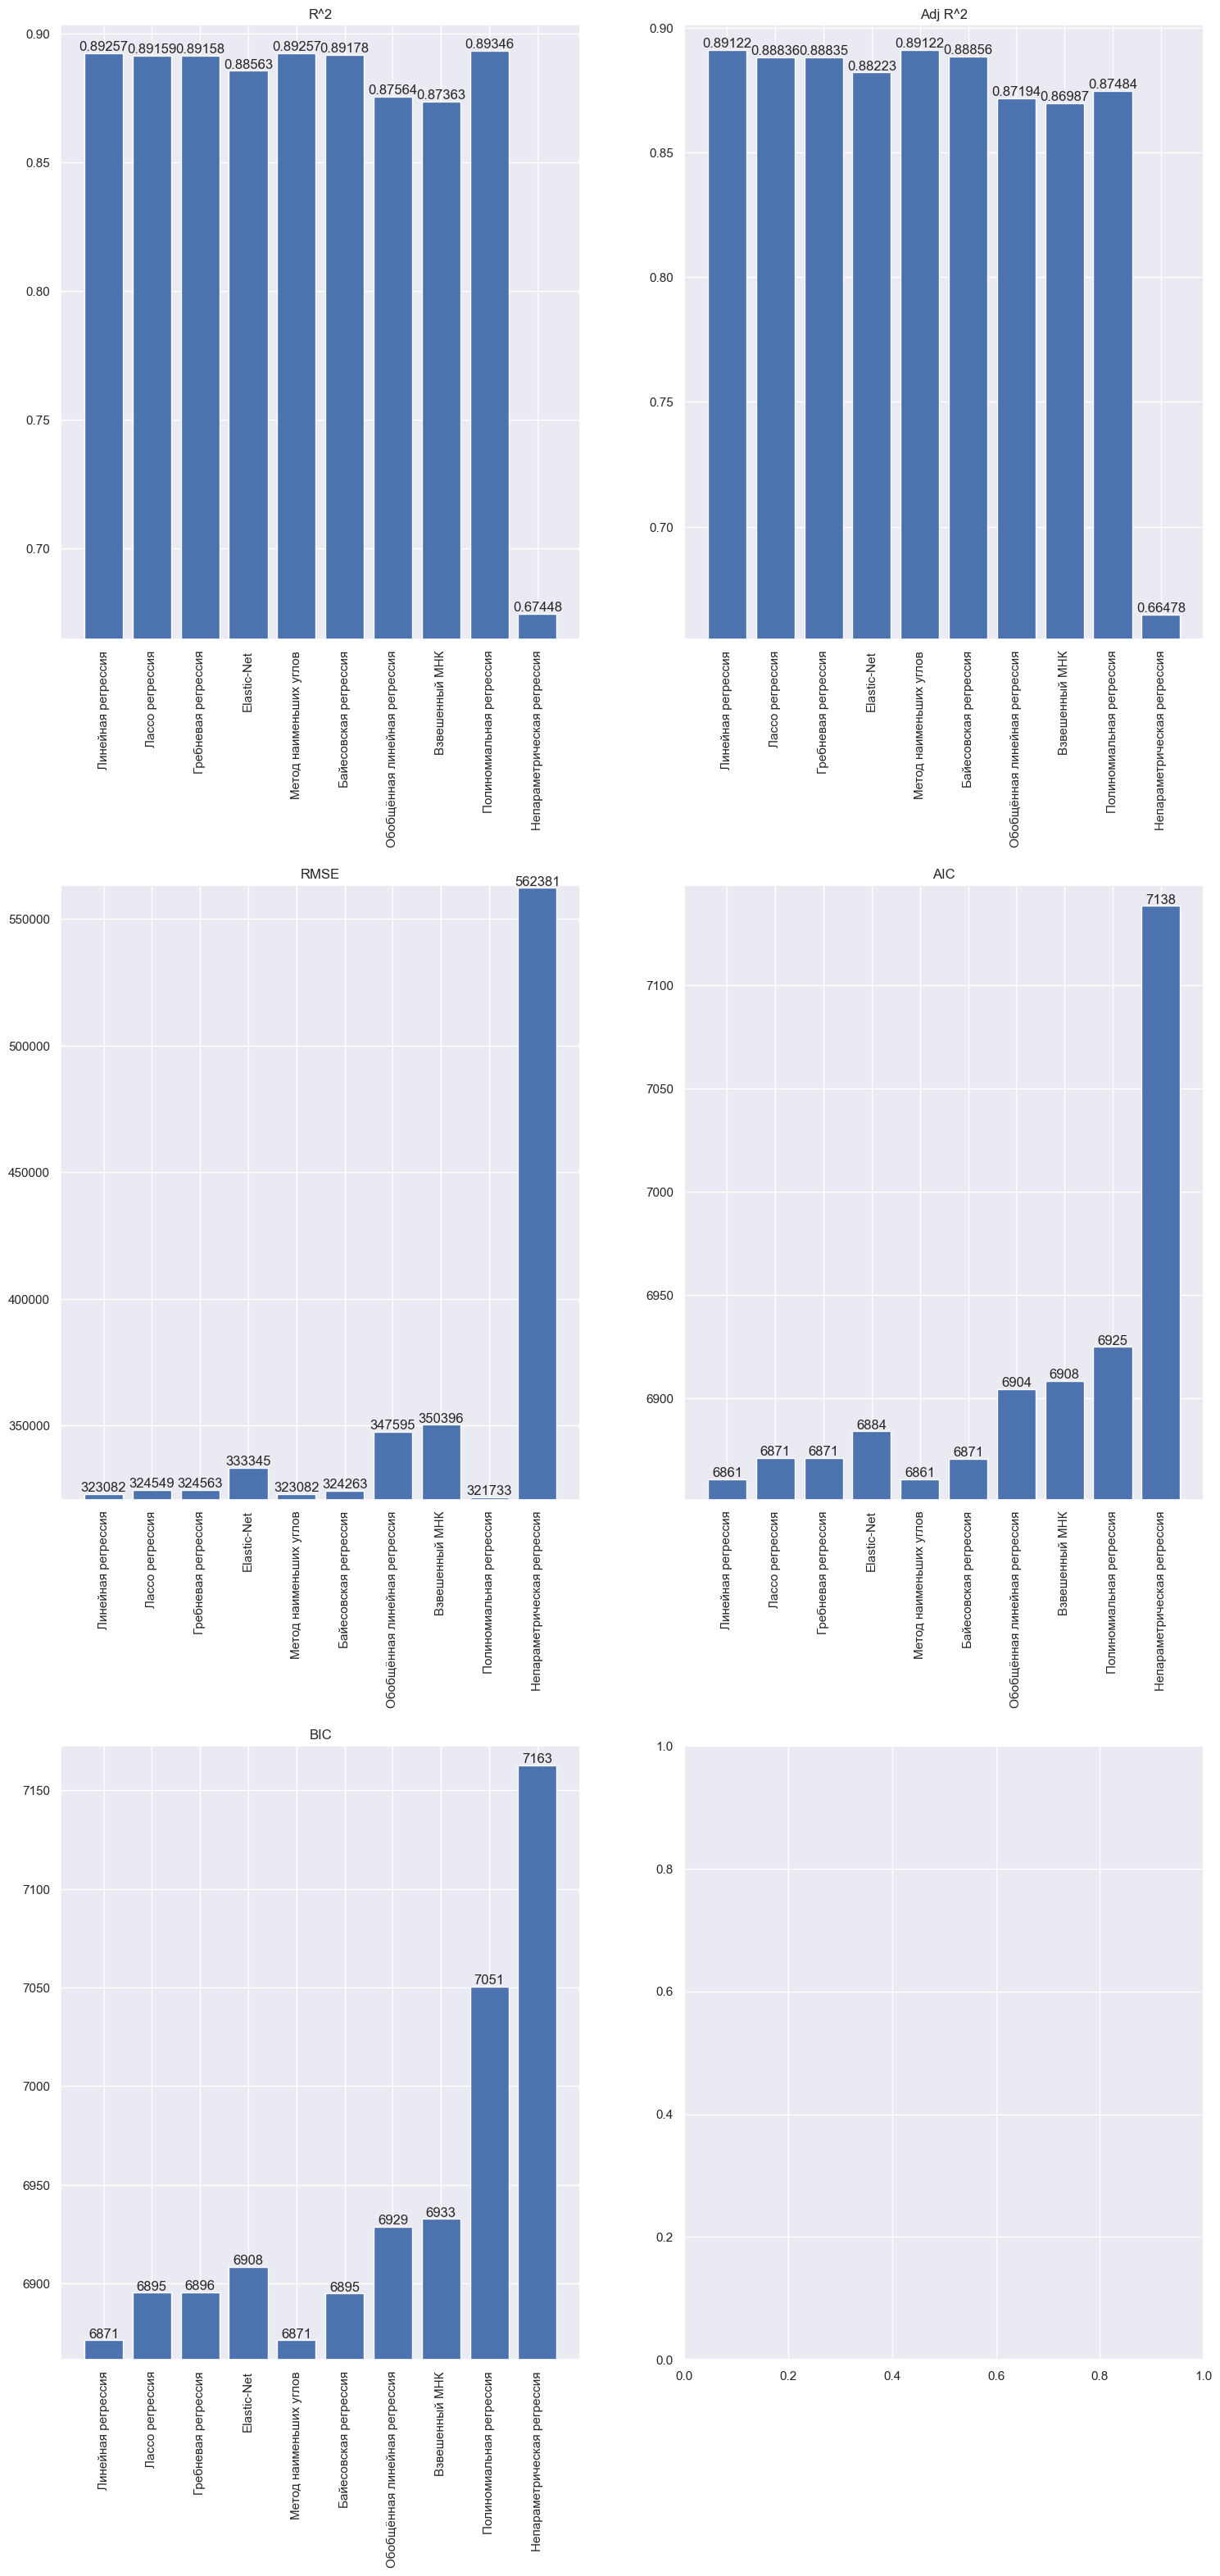

In [109]:
ylims = {
    "R^2": [min(list_models["R^2"]) - 0.01, max(list_models["R^2"]) + 0.01],
    "Adj R^2": [min(list_models["Adj R^2"]) - 0.01, max(list_models["Adj R^2"]) + 0.01],
    "RMSE": [min(list_models["RMSE"]) - 1000, max(list_models["RMSE"]) + 1000],
    "AIC": [min(list_models["AIC"]) - 10, max(list_models["AIC"]) + 10],
    "BIC": [min(list_models["BIC"]) - 10, max(list_models["BIC"]) + 10],
}
sb.set(font_scale=1)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 37))
fig.subplots_adjust(hspace=0.4)

for ax, comb in zip(axs.flatten(),
                    product(["Название модели"], list_models.columns.tolist()[1:])):
    model_names, cur_stat = comb
    to_plot = list_models[list(comb)]
    title = cur_stat
    ax.set_ylim(ylims[title])
    ax.set_title(title)

    ax.bar(list_models[model_names], list_models[cur_stat])
    ax.set_xticklabels(list(to_plot[model_names]), rotation=90)

    for i, val in enumerate(to_plot[cur_stat]):
        ax.text(i, val, str(round(val, 5 if val < 1 else None)), ha='center',
                va='bottom')

In [110]:
print("Лучшие модели")
print(list_models[list_models["Adj R^2"] == list_models["Adj R^2"].max()]["Название модели"])

Лучшие модели
0        Линейная регрессия
4    Метод наименьших углов
Name: Название модели, dtype: object


Эти модели имеют максимальное значение скорректированного коэффициента детерминации, который показывает, какая доля дисперсии зависимой переменной объясняется регрессионной моделью с учетом количества предикторов в модели. Чем выше значение Adj R^2, тем лучше модель соответствует данным и тем меньше она переобучена.

In [111]:
def create_submission(id_col, y_pred) -> pd.DataFrame:
    """Создание итоговой выборки."""
    submission = pd.DataFrame({
        "id": id_col,
        "Цена": y_pred,
    })
    return submission



print(dataframe_train.columns.drop(result_column))
test_data = dataframe_train[dataframe_train.columns.drop(result_column)]

model = final_models[0]
y_test_predicted = model.predict(test_data)
sub = create_submission(
    test_ids,
    list(item for item in y_test_predicted.tolist()),
)
sub.to_csv("../data/sample.csv", index=False)

Index(['Общая.площадь', 'Раздельный.санузел', 'Лифт', 'Мусоропровод',
       'Стоматология.1000', 'Остановка.1000', 'Банк.1000'],
      dtype='object')


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Банк.1000
- Мусоропровод
- Остановка.1000
- Раздельный.санузел
